## Previsão de Churn na Telecomunicação

![](vantagens-e-desvantagens-de-uma-consultoria-em-telecom.jpg)


Link do Kaggle para este conjunto de dados: https://www.kaggle.com/radmirzosimov/telecom-users-dataset


Qualquer empresa deseja maximizar o número de clientes. Para atingir esse objetivo, é importante não apenas tentar atrair novos, mas também reter os existentes. Reter um cliente custará menos para a empresa do que atrair um novo. Além disso, um novo cliente pode ter pouco interesse em serviços empresariais e será difícil trabalhar com ele, enquanto os clientes antigos já possuem os dados necessários sobre a interação com o serviço.

Nesse sentido, prevendo o Churn, podemos reagir a tempo e tentar manter o cliente que deseja sair. Com base nos dados sobre os serviços que o cliente utiliza, podemos fazer-lhe uma oferta especial, tentando alterar a sua decisão de deixar a operadora. Isso tornará a tarefa de retenção mais fácil de implementar do que a tarefa de atrair novos usuários, sobre os quais ainda não sabemos nada.



### Objetivo
Recebemos um conjunto de dados de uma empresa de telecomunicações. Os dados contêm informações sobre quase seis mil usuários, suas características demográficas, os serviços que utilizam, o tempo de utilização dos serviços da operadora, a forma de pagamento e o valor do pagamento. Com isso, o objetivo do projeto é criar um modelo de machine learning a fim de tentar prever se o cliente deseja sair da empresa.

### Variáveis
- ID do cliente - Identificação do cliente
- gender - gênero do cliente (masculino / feminino)
- SeniorCitizen - é o cliente aposentado (1, 0)
- Partner - o cliente é casado (Sim, Não)
- tenure - há quantos meses uma pessoa é cliente da empresa
- PhoneService - o serviço telefônico está conectado (Sim, Não)
- MultipleLines - são várias linhas telefônicas conectadas (Sim, Não, Sem serviço telefônico)
- InternetService - provedor de serviços de Internet do cliente (DSL, fibra óptica, não)
- OnlineSecurity - é o serviço de segurança online conectado (Sim, Não, Sem serviço de internet)
- OnlineBackup - é o serviço de backup online ativado (Sim, Não, Sem serviço de Internet)
- DeviceProtection - o cliente tem seguro de equipamento (Sim, Não, Sem serviço de internet)
- TechSupport - é o serviço de suporte técnico conectado (Sim, Não, Sem serviço de Internet)
- StreamingTV - é o serviço de streaming de TV conectado (Sim, Não, Sem serviço de Internet)
- StreamingMovies - é o serviço de streaming de cinema ativado (Sim, Não, Sem serviço de Internet)
- Contract - tipo de contrato do cliente (mês a mês, um ano, dois anos)
- PaperlessBilling  - se o cliente usa faturamento sem papel (Sim, Não)
- PaymentMethod - método de pagamento (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - pagamento mensal atual
- TotalCharges - o valor total que o cliente pagou pelos serviços durante todo o tempo
- Churn - se houve um cancelamento (Sim ou Não)

### Etapas

- 0.0. Importação
- 1.0. Descrição dos Dados
- 2.0. Feature Engineering
- 3.0. Filtrando os Dados
- 4.0. Exploração e análise dos Dados
- 5.0. Preparção dos Dados
- 6.0. Seleção de Features
- 7.0. Machine Learning
- 8.0. Ajuste dos Hiperparâmetros
- 9.0. Performance de Negócio

## 0.0. Importação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 0.1 Carregando Dados

In [2]:
raw_df= pd.read_csv('telecom_users.csv')

raw_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


## 1.0. Descrição dos Dados

### 1.1. Renomeando Colunas

In [3]:
raw_df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

- Vamos manter as colunas em inglês.

### 1.2. Dimensão dos dados

In [4]:
print('Dataset possui {} linhas.'.format(raw_df.shape[0]))
print('Dataset possui {} colunas.'.format(raw_df.shape[1]))

Dataset possui 5986 linhas.
Dataset possui 22 colunas.


### 1.3. Tipo dos Dados

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


### 1.4. Checar Valores Nulos

In [6]:
raw_df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 1.5. Checar Valores das Colunas

In [7]:
for i in raw_df.columns:
    print(i)
    print(raw_df[i].dtype)
    print('Os valores únicos são ', raw_df[i].unique())
    print('-'*100)

Unnamed: 0
int64
Os valores únicos são  [1869 4528 6344 ... 5226 5390  860]
----------------------------------------------------------------------------------------------------
customerID
object
Os valores únicos são  ['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
----------------------------------------------------------------------------------------------------
gender
object
Os valores únicos são  ['Male' 'Female']
----------------------------------------------------------------------------------------------------
SeniorCitizen
int64
Os valores únicos são  [0 1]
----------------------------------------------------------------------------------------------------
Partner
object
Os valores únicos são  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents
object
Os valores únicos são  ['Yes' 'No']
------------------------------------------------------------------------------------

### 1.7. Mudar Tipos
A feature ````TotalCharges```` apresenta valores numéricos, porém o seu tipo está como Object. Vamos fazer essa transformação.

In [8]:
df= raw_df.copy()

In [9]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors= 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


### 1.8. Preencher Valores Nulos

In [10]:
df.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [11]:
# Excluindo as linhas com valores nulos
df.dropna(inplace= True)

# Ajeitando o index
df.index= range(len(df))

### 1.9. Descrição Estatística
Esta etapa é essencial. É necessário separar as variáveis numéricas das variáveis categóricas. Porque cada um terá uma forma diferente de análise.

#### 1.9.1. Atributos Numéricos

In [12]:
df.describe().round(2)

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.00,5976.00,5976.00,5976.00,5976.00
mean,3534.77,0.16,32.52,64.85,2298.06
std,2035.41,0.37,24.50,30.11,2274.13
min,0.00,0.00,1.00,18.25,18.80
25%,1779.75,0.00,9.00,35.75,404.31
50%,3548.00,0.00,29.00,70.43,1412.15
75%,5293.50,0.00,56.00,89.90,3846.96
max,7042.00,1.00,72.00,118.75,8684.80


- Apesar da coluna ````SeniorCitizen```` estar no formato numérico, na verdade é categórica.
- A coluna ````Unnamed: 0```` é uma coluna desnecessária para o nosso projeto.

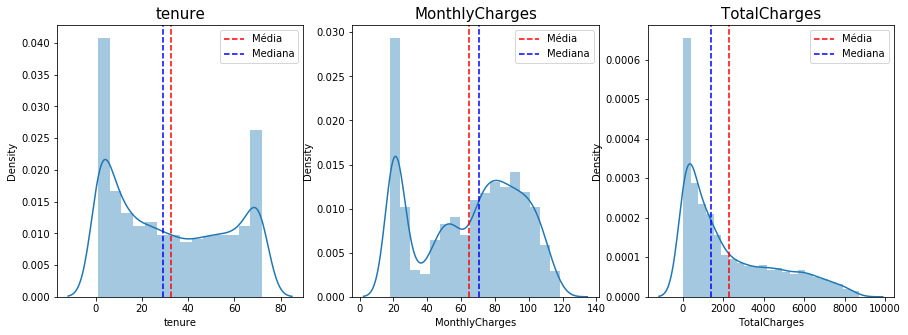

In [13]:
lista_numericos= ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize= (15, 5))

n= 1
for i in lista_numericos:
    plt.subplot(1, 3, n)
    sns.distplot(df[i])
    plt.title(i, fontsize= 15) 
    plt.axvline(df[i].mean(), color= 'r', linestyle= '--', label= 'Média')   
    plt.axvline(df[i].median(), color= 'b', linestyle= '--', label= 'Mediana')
    plt.legend()
    n+= 1

#### 1.9.2 Atributos Categóricos
- A feature ````customerID```` não vai ser necessária na nossa etapa de análise.

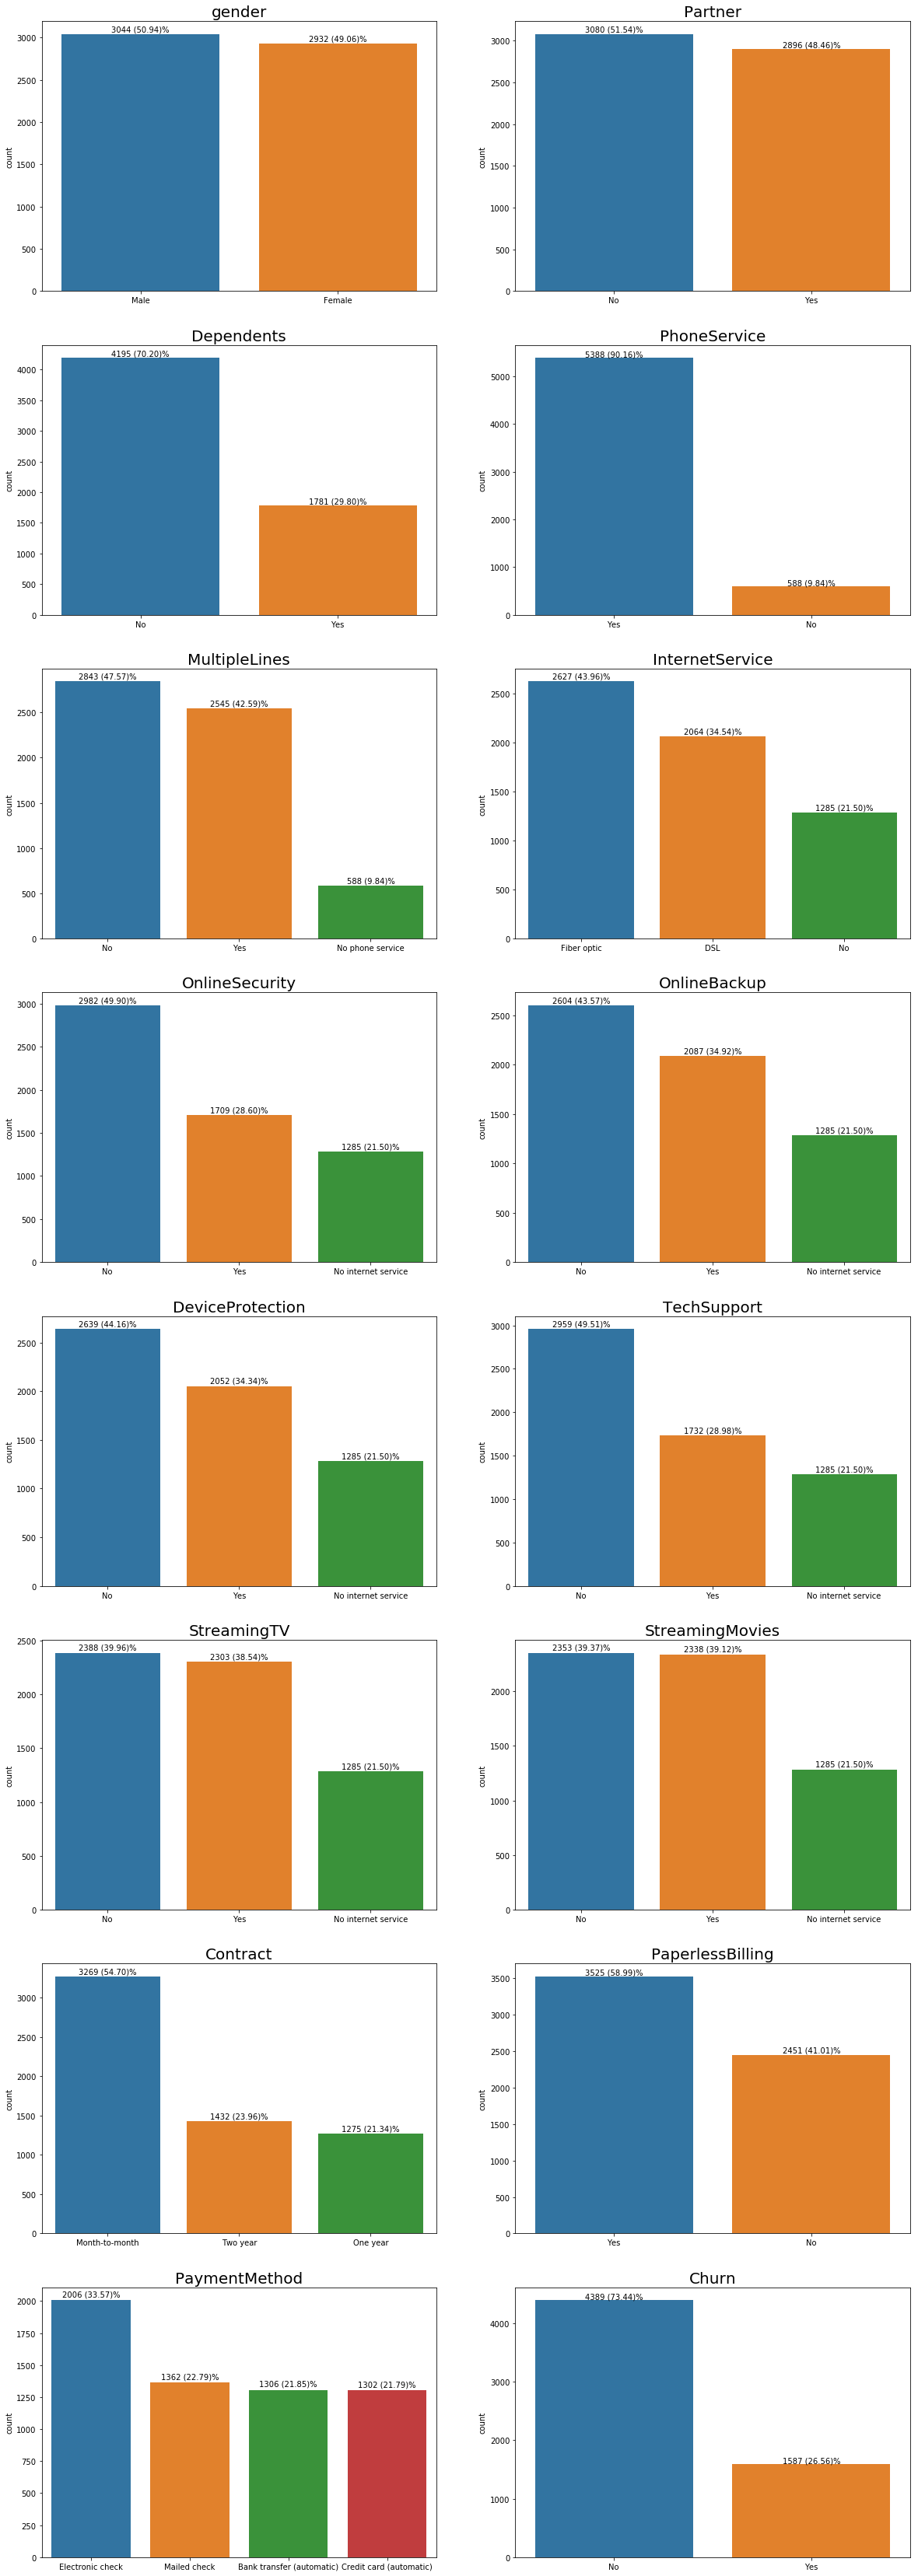

In [14]:
lista_categoricas= [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize= (20, 60))

n= 1
for i in lista_categoricas:
    plt.subplot(8, 2, n)
    ax= sns.countplot(x= i, data= df, order= df[i].value_counts().index)
    plt.title(i, fontsize= 20)
    plt.xlabel('')
    
    for patch in ax.patches:
        height= patch.get_height()
        width= patch.get_width()
        left_coord= patch.get_x()
        percent= height/len(df)*100
        
        ax.text(left_coord + width/2, height + 30, '{} ({:.2f})%'.format(height, percent), ha= 'center')
    n+= 1

A partir dos gráficos acima, podemos tirar algumas conclusões:
- A taxa de cancelamento(Churn) é de 26,56%
- O dataset possui um número equilibrado dos gêneros das pessoas e se elas possuem parceiros(as).
- 90% dos clientes possuem serviço telefônico.
- Metade dos clientes possuem contrato de 1 mês.

## 2.0. FEATURE ENGINEERING

### 2.1. Lista de Hipóteses

- H1: O gênero do cliente pode influênciar o Churn.
- H2: Idosos são mais propensos a ter o Churn que os mais jovens.
- H3: Clientes com parceiro parceiros(as) e/ou dependentes têm maior tendência ao cancelamento.
- H4: Clientes mais recentes tendem a cancelar mais do que aqueles que já estão na empresa a mais tempo.
- H5: Clientes que possuem mais serviços  tendem a ficar com a empresa.
- H6: O tipo de contrato pode influenciar o Churn.
- H7: Fatura digital pode influenciar o Churn.
- H8: O método de pagamento pode influenciar o Churn.
- H9: Quanto maior o valor mensal, maior é a chance de Churn.
- H10: Quanto maior o valor total gasto, menor é a chance de Churn.

### 2.2. Criando novas Features

In [15]:
df2= df.copy()

#### 2.2.1.Criando coluna TamanhoFamilia

In [16]:
# Criando coluna Tamanho Familia juntando as colunas de parceiro(a) e dependentes
df2['TamanhoFamilia']= df2['Partner'] + df2['Dependents']

# Mudando os valores para Grande, Média e pequena
tamanho= {'YesYes': 'Grande', 'NoNo': 'Pequena', 'YesNo': 'Média', 'NoYes': 'Média'}

df2['TamanhoFamilia']= df2['TamanhoFamilia'].map(tamanho)

df2.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TamanhoFamilia
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,Grande
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,Pequena
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,Média
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,Pequena
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,Pequena


#### Criando coluna NumeroServicos
A quantidade de serviços que cada cliente possui

In [17]:
# Definindo uma função para cada coluna em cada linha
def numeroservico(lista):
    valores= []    
    for i in range(0,len(df2)):
        n= 9        
        for j in lista:
            if ((df2[j].iloc[i] == 'No') or (df2[j].iloc[i] == 'No internet service')):
                n-= 1
        valores.append(n)        
    return valores

In [18]:
lista= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']

df2['NumeroServicos']= numeroservico(lista)

In [19]:
df2.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TamanhoFamilia,NumeroServicos
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,Grande,2
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,Pequena,5
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,Média,3
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,Pequena,3
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,Pequena,4


## 3.0. Filtrando os Dados


Nesta etapa, vamos garantir que trabalharemos apenas com as informações que serão importantes para nós. Vamos separar essa etapa em duas:

- 1. Filtrando linhas.

- 2. Filtrando colunas.


### 3.1. Filtrando linhas

Não vamos filtrar nenhuma linha nesse projeto

### 3.2. Filtrando colunas
Vamos filtrar as duas colunas (	Unnamed: 0	 e customerID) pois não serão úteis para o nosso modelo como mencionado anteriormente.

In [20]:
df3= df2.copy()

In [21]:
df3.drop(columns= ['Unnamed: 0', 'customerID'], inplace= True)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TamanhoFamilia,NumeroServicos
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,Grande,2
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,Pequena,5
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,Média,3
3,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,Pequena,3
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,Pequena,4


## 4.0. Análise Exploratória dos Dados


### 4.2. Testes de Hipóteses

#### H1: O gênero do cliente pode influênciar o Churn.
**Falso**. Temos praticamente a mesma proporção de Churn para ambos os sexos.

Text(0.5,1,'Mulheres x Churn')

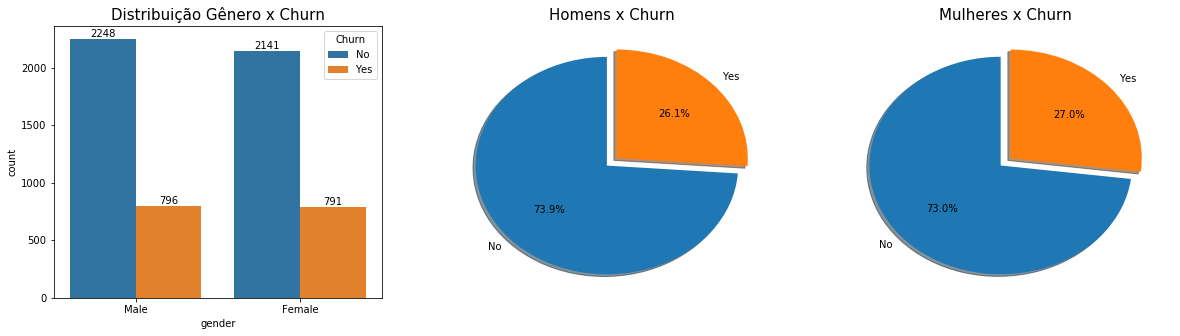

In [22]:
homens= df3[df3['gender'] == 'Male']
mulheres= df3[df3['gender'] == 'Female']

plt.figure(figsize= (20, 5))

plt.subplot(1, 3, 1)
ax= sns.countplot(x= 'gender', data= df3, hue= 'Churn')
plt.title('Distribuição Gênero x Churn', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 20, '{}'.format(height), ha= 'center')

plt.subplot(1, 3, 2)
plt.pie(x= homens['Churn'].value_counts(), labels= homens['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Homens x Churn', fontsize= 15)


plt.subplot(1, 3, 3)
plt.pie(x= mulheres['Churn'].value_counts(), labels= mulheres['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Mulheres x Churn', fontsize= 15)

#### H2: Idosos são mais propensos a ter o Churn que os mais jovens.
**Verdadeiro**. A proporção de idosos que realizam o Churn(41,6%) é quase o dobro quando comparado aos jovens(23,7%).

Text(0.5,1,'Jovens x Churn')

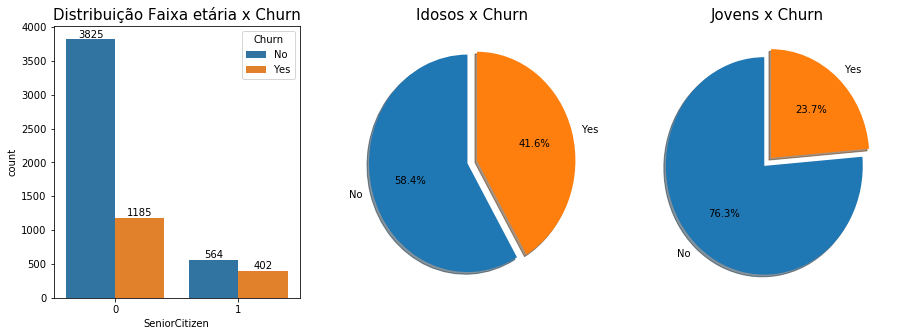

In [23]:
idoso= df3[df3['SeniorCitizen'] == 1]
jovem= df3[df3['SeniorCitizen'] == 0]

plt.figure(figsize= (15, 5))

# Gráfico de Barras
plt.subplot(1, 3, 1)
ax= sns.countplot(x= 'SeniorCitizen', data= df3, hue= 'Churn')
plt.title('Distribuição Faixa etária x Churn', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 20, height, ha= 'center')

# Pie de idosos
plt.subplot(1, 3, 2)
plt.pie(x= idoso['Churn'].value_counts(), labels= idoso['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Idosos x Churn', fontsize= 15)

# Pie de Jovens
plt.subplot(1, 3, 3)
plt.pie(x= jovem['Churn'].value_counts(), labels= jovem['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Jovens x Churn', fontsize= 15)

In [24]:
df2.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TamanhoFamilia,NumeroServicos
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,Grande,2
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,Pequena,5
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,Média,3
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,Pequena,3
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,Pequena,4


####  H3: Clientes com família grande (com parceiro parceiros(as) e/ou dependentes) têm maior tendência ao cancelamento.
**Falso**. Quanto menor a família, mais provável é dela fazer o Churn.

Text(0.5,1,'Familia Grande x Churn')

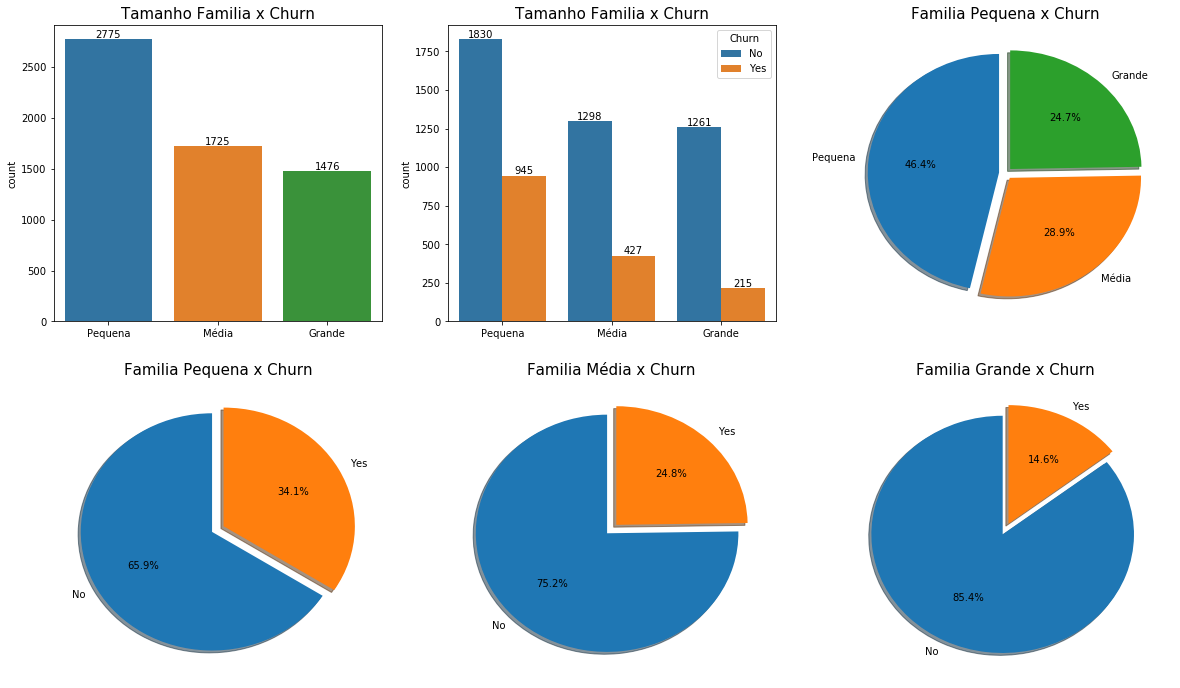

In [25]:
grande= df3[df3['TamanhoFamilia'] == 'Grande']
media= df3[df3['TamanhoFamilia'] == 'Média']
pequena= df3[df3['TamanhoFamilia'] == 'Pequena']

plt.figure(figsize= (20, 12))

# Gráfico de barras 1
plt.subplot(2, 3, 1)
ax= sns.countplot(x= df3['TamanhoFamilia'], order= ['Pequena', 'Média', 'Grande'])
plt.title('Tamanho Familia x Churn', fontsize= 15)
plt.xlabel('')

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 10, height, ha= 'center')

# Gráfico de barras 2
plt.subplot(2, 3, 2)
ax= sns.countplot(x= df3['TamanhoFamilia'], hue= df3['Churn'], order= ['Pequena', 'Média', 'Grande'])
plt.title('Tamanho Familia x Churn', fontsize= 15)
plt.xlabel('')

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 10, height, ha= 'center')

# Gráfico Pie 1
plt.subplot(2, 3, 3)
plt.pie(x= df3['TamanhoFamilia'].value_counts(), labels= df3['TamanhoFamilia'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05, 0.05], shadow= True)
plt.title('Familia Pequena x Churn', fontsize= 15)

# Gráfico Pie 2
plt.subplot(2, 3, 4)
plt.pie(x= pequena['Churn'].value_counts(), labels= pequena['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Familia Pequena x Churn', fontsize= 15)


# Gráfico Pie 3
plt.subplot(2, 3, 5)
plt.pie(x= media['Churn'].value_counts(), labels= media['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Familia Média x Churn', fontsize= 15)


# Gráfico Pie 4
plt.subplot(2, 3, 6)
plt.pie(x= grande['Churn'].value_counts(), labels= grande['Churn'].value_counts().index, autopct= '%.1f%%', 
       startangle= 90, explode= [0.05, 0.05], shadow= True)
plt.title('Familia Grande x Churn', fontsize= 15)

#### H4: Clientes mais recentes tendem a cancelar mais do que aqueles que já estão na empresa a mais tempo.
**Verdade**. Vemos um pico de Churn no primeiro ano dos clientes com a empresa, onde a média das pessoas que fazem o Churn é de 1 ano e meio(18 meses).

Text(38.8159,0.0332286,'Média= 37.7')

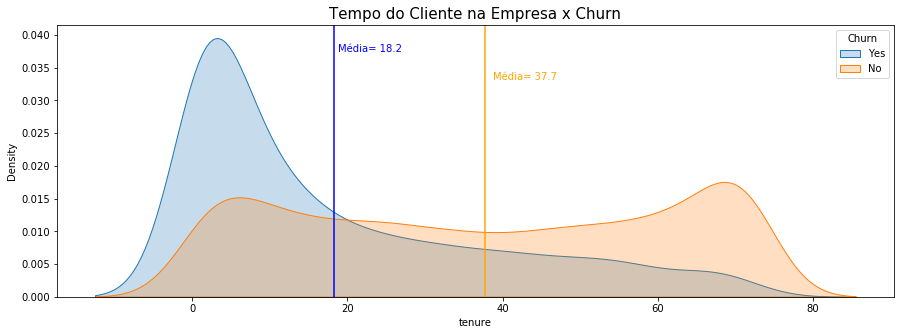

In [26]:
yes_churn= df3[df3['Churn'] == 'Yes']
no_churn= df3[df3['Churn'] == 'No']

plt.figure(figsize= (15, 5))

# Gráfico
sns.kdeplot(yes_churn['tenure'], shade= True)
sns.kdeplot(no_churn['tenure'], shade= True)
plt.legend(['Yes', 'No'], title= 'Churn')
plt.title('Tempo do Cliente na Empresa x Churn', fontsize= 15)

# Linhas
plt.axvline(yes_churn['tenure'].mean(), color= 'blue')
plt.axvline(no_churn['tenure'].mean(), color= 'orange')

# Textos
min_y, max_y= plt.ylim()
plt.text(yes_churn['tenure'].mean()*1.03, max_y*0.9, 'Média= {:.1f}'.format(yes_churn['tenure'].mean()), color= 'blue')
plt.text(no_churn['tenure'].mean()*1.03, max_y*0.8, 'Média= {:.1f}'.format(no_churn['tenure'].mean()), color= 'orange')

#### H5: Clientes que possuem mais serviços tendem a ficar com a empresa.
**Verdadeiro**. O pico de Churn é quando as pessoas têm 3 serviços e vai decaindo até o máximo de serviços que são 9.

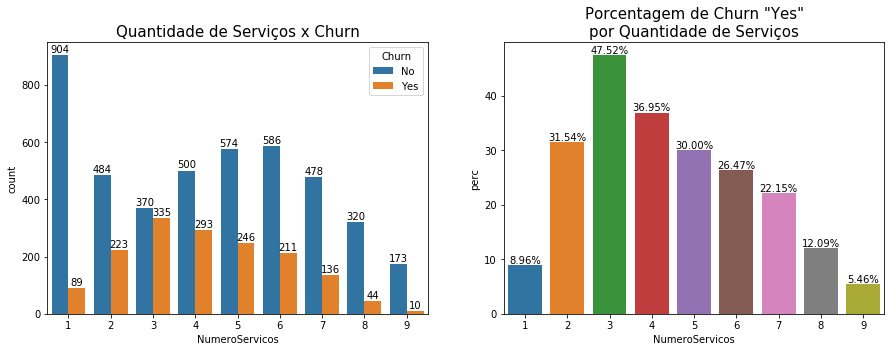

In [27]:
plt.figure(figsize= (15, 5))

# Gráfico
plt.subplot(1, 2, 1)
ax= sns.countplot(x= 'NumeroServicos', hue= 'Churn', data= df3)
plt.title('Quantidade de Serviços x Churn', fontsize= 15)


for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 10, height, ha= 'center')

    

plt.subplot(1, 2, 2)

agr= df3.groupby(['NumeroServicos', 'Churn'])['Churn'].agg(['count']).reset_index()
no_agr= agr[agr['Churn'] == 'Yes']
no_agr['perc']= no_agr['count']/df3.groupby(['NumeroServicos'])['Churn'].count().values*100

ax= sns.barplot(x= 'NumeroServicos', y= 'perc', data= no_agr)
plt.title('Porcentagem de Churn "Yes"\npor Quantidade de Serviços', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 0.3, '{:.2f}%'.format(height), ha= 'center')

#### H6: O tipo de contrato pode influenciar o Churn.
**Verdadeiro**. Podemos perceber que o tipo de contrato Month-to-Month(Mês a mês) possui uma porcentagem muito superior aos outros dois tipos de contrato.

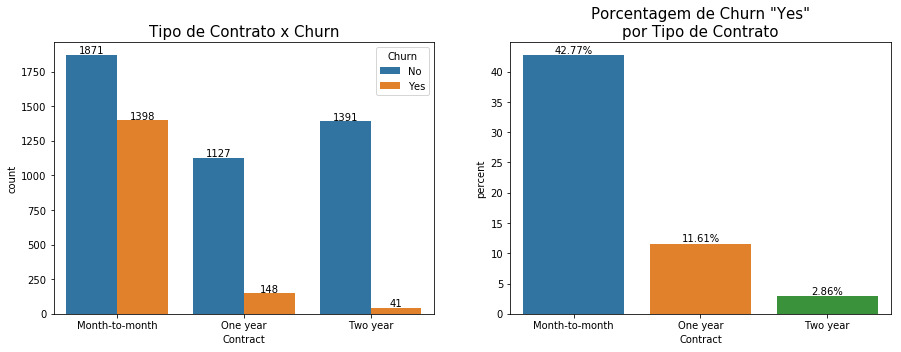

In [28]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 2, 1)
ax= sns.countplot(x= 'Contract', data= df3, hue= 'Churn', order= [ 'Month-to-month', 'One year', 'Two year'])
plt.title('Tipo de Contrato x Churn', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 10, height, ha= 'center')

plt.subplot(1, 2, 2)
agr= df3.groupby(['Contract', 'Churn'])['Churn'].agg(['count']).reset_index()
agr_no= agr[agr['Churn'] == 'Yes']
agr_no['percent']= agr_no['count']/df3.groupby(['Contract'])['Churn'].count().values*100

ax= sns.barplot(x= 'Contract', y= 'percent', data= agr_no)
plt.title('Porcentagem de Churn "Yes"\npor Tipo de Contrato', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 0.3, '{:.2f}%'.format(height), ha= 'center')

#### H7: Fatura digital pode influenciar o Churn.
**Verdadeiro**. Vemos uma proporção bem maior de Churn com as pessoas que têm fatura digital.

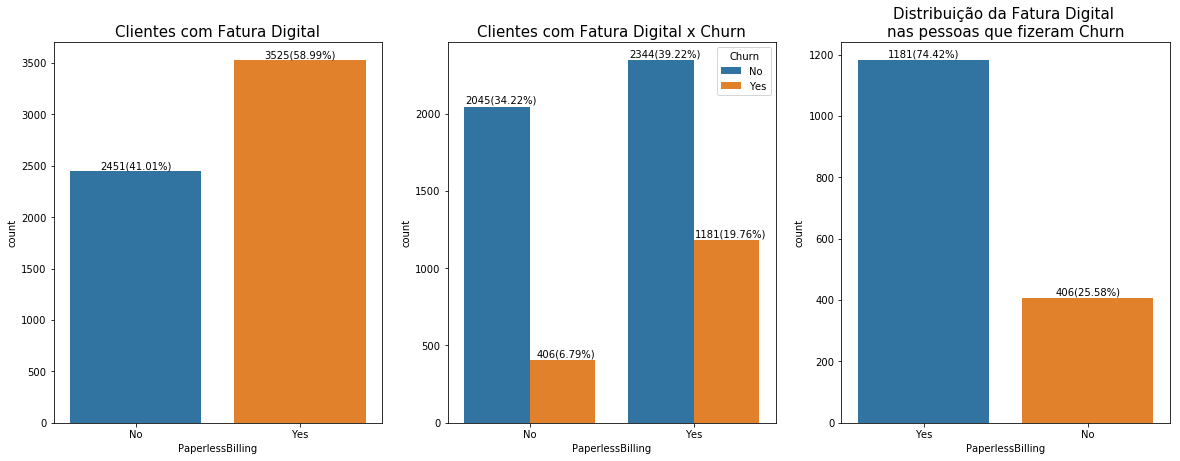

In [29]:
yes_churn= df3[df3['Churn'] == 'Yes']

plt.figure(figsize= (20, 7))

# Gráfico 1
plt.subplot(1, 3, 1)
ax= sns.countplot(x= df3['PaperlessBilling'])
plt.title('Clientes com Fatura Digital', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(df3)*100
    
    ax.text(left_coord + width/2, height + 20, '{}({:.2f}%)'.format(height, percent), ha= 'center')

# Gráfico 2
plt.subplot(1, 3, 2)
ax= sns.countplot(x= 'PaperlessBilling', data= df3, hue= 'Churn')
plt.title('Clientes com Fatura Digital x Churn', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(df3)*100
    
    ax.text(left_coord + width/1.8, height + 20, '{}({:.2f}%)'.format(height, percent), ha= 'center')

# Gráfico 3
plt.subplot(1, 3, 3)
ax= sns.countplot(x= yes_churn['PaperlessBilling'])
plt.title('Distribuição da Fatura Digital \nnas pessoas que fizeram Churn', fontsize= 15)
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(yes_churn)*100
    
    ax.text(left_coord + width/2, height + 10, '{}({:.2f}%)'.format(height, percent), ha= 'center')

#### H8: O método de pagamento pode influenciar o Churn.
**Verdadeiro**. Podemos observar que a proporção de Churn no método de pagamento Eletronic Check é duas vezes maior do que qualquer outro método.

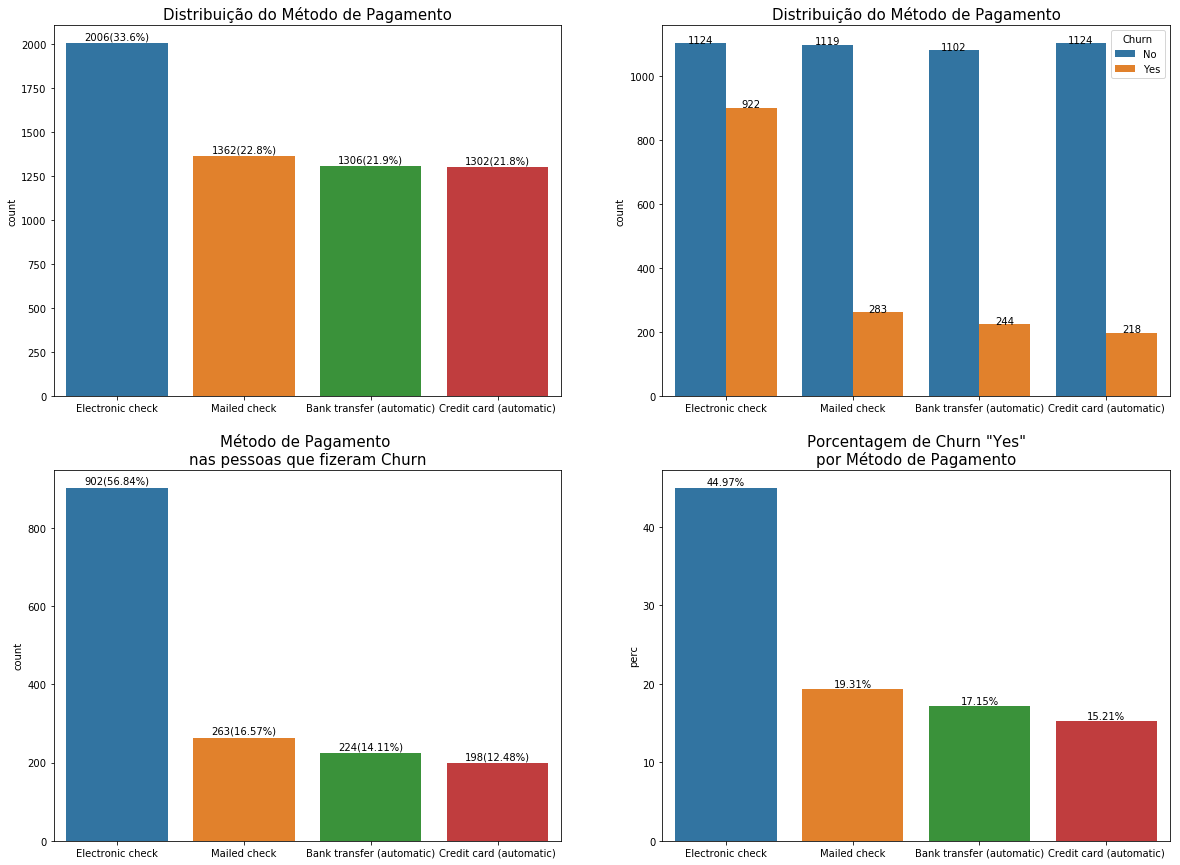

In [30]:
plt.figure(figsize= (20, 15))

# Gráfico 1
plt.subplot(2, 2, 1)
ax= sns.countplot(x= df3['PaymentMethod'], order= df3['PaymentMethod'].value_counts().index)
plt.title('Distribuição do Método de Pagamento', fontsize= 15)
plt.xlabel('')
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(df3)*100
    
    ax.text(left_coord + width/2, height + 20, '{}({:.1f}%)'.format(height, percent), ha= 'center')

# Gráfico 2
plt.subplot(2, 2, 2)
ax= sns.countplot(x= df3['PaymentMethod'], hue= df3['Churn'], order= df3['PaymentMethod'].value_counts().index)
plt.title('Distribuição do Método de Pagamento', fontsize= 15)
plt.xlabel('')
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 0.3, height + 20, ha= 'center')
    
# Gráfico 3    
plt.subplot(2, 2, 3)
ax= sns.countplot(x= yes_churn['PaymentMethod'], order= df3['PaymentMethod'].value_counts().index)
plt.title('Método de Pagamento \nnas pessoas que fizeram Churn', fontsize= 15)
plt.xlabel('')
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(yes_churn)*100
    
    ax.text(left_coord + width/2, height + 10, '{}({:.2f}%)'.format(height, percent), ha= 'center')

    
# Gráfico 4
plt.subplot(2, 2, 4)
agr= df3.groupby(['PaymentMethod', 'Churn'])['Churn'].agg(['count']).reset_index()
no_agr= agr[agr['Churn'] == 'Yes']
no_agr['perc']= no_agr['count']/df3.groupby(['PaymentMethod'])['Churn'].count().values*100

ax= sns.barplot(x= 'PaymentMethod', y= 'perc', data= no_agr, order= df3['PaymentMethod'].value_counts().index)
plt.title('Porcentagem de Churn "Yes"\npor Método de Pagamento', fontsize= 15)
plt.xlabel('')
for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    
    ax.text(left_coord + width/2, height + 0.3, '{:.2f}%'.format(height), ha= 'center')

#### H9: Quanto maior o valor mensal, maior é a chance de Churn.
**Verdadeiro**. Ao igualar a escala dos clientes que fizeram Churn e os que não fizeram, percebemos que o primeiro têm a tendência de aumentar conforme o valor mensal aumenta. Já no segundo, temos um pico positivo no valor de 20 e um pico negativo no valor entre 30 e 40.

Text(62.0921,0.017134,'Média= 61.5')

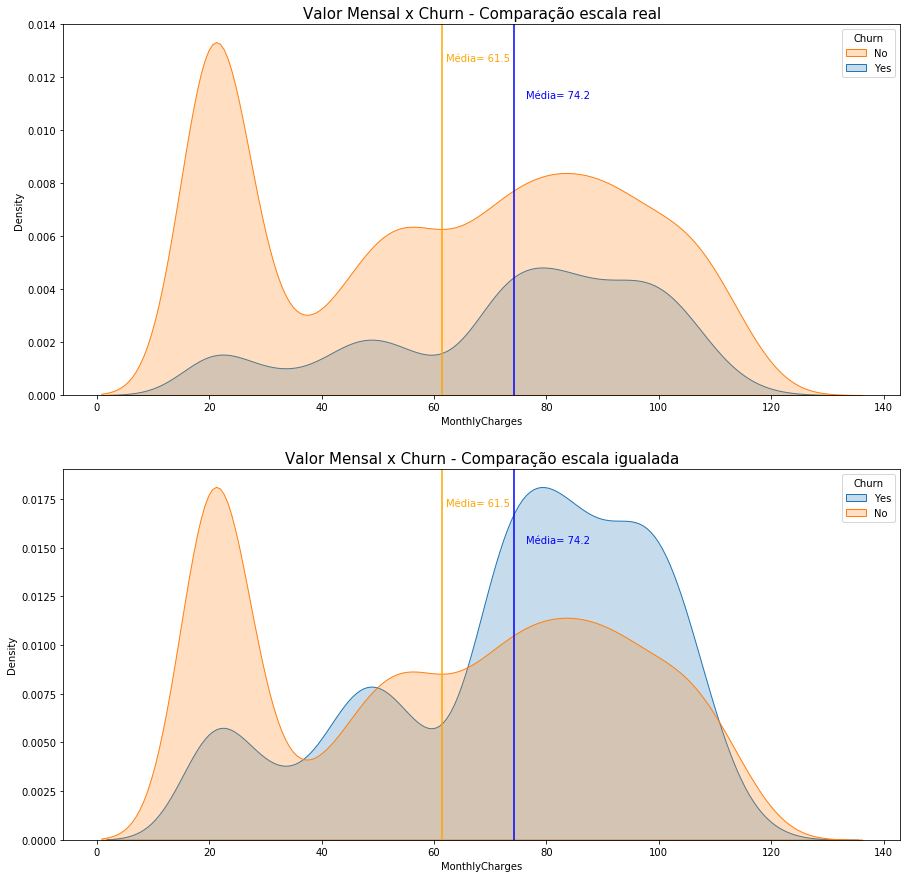

In [31]:
plt.figure(figsize= (15, 15))

# Gráfico 1
plt.subplot(2, 1, 1)
sns.kdeplot(df3['MonthlyCharges'], hue= df3['Churn'], shade= True, palette={'Yes':'#1f77b4', 'No':'#ff7f0e'})
plt.title('Valor Mensal x Churn - Comparação escala real', fontsize= 15)

# Linhas
plt.axvline(yes_churn['MonthlyCharges'].mean(), color= 'blue')
plt.axvline(no_churn['MonthlyCharges'].mean(), color= 'orange')

# Textos
min_y, max_y= plt.ylim()
plt.text(yes_churn['MonthlyCharges'].mean()*1.03, max_y*0.8, 
         'Média= {:.1f}'.format(yes_churn['MonthlyCharges'].mean()), color= 'blue')

plt.text(no_churn['MonthlyCharges'].mean()*1.01, max_y*0.9, 
         'Média= {:.1f}'.format(no_churn['MonthlyCharges'].mean()), color= 'orange')


# Gráfico 2
plt.subplot(2, 1, 2)
sns.kdeplot(yes_churn['MonthlyCharges'], shade= True)
sns.kdeplot(no_churn['MonthlyCharges'], shade= True)
plt.legend(['Yes', 'No'], title= 'Churn')
plt.title('Valor Mensal x Churn - Comparação escala igualada', fontsize= 15)

# Linhas
plt.axvline(yes_churn['MonthlyCharges'].mean(), color= 'blue')
plt.axvline(no_churn['MonthlyCharges'].mean(), color= 'orange')

# Textos
min_y, max_y= plt.ylim()
plt.text(yes_churn['MonthlyCharges'].mean()*1.03, max_y*0.8, 
         'Média= {:.1f}'.format(yes_churn['MonthlyCharges'].mean()), color= 'blue')

plt.text(no_churn['MonthlyCharges'].mean()*1.01, max_y*0.9, 
         'Média= {:.1f}'.format(no_churn['MonthlyCharges'].mean()), color= 'orange')

#### H10: Quanto maior o valor total gasto, menor é a chance de Churn.
**Falso**. Observamos que a diferença da média das pessoas que fizeram o Churn é de R$ 1.000 para as que não fizeram, porém o comportamento dos dois grupos é bem parecido, onde temo um pico entre RS 0 e RS 1.000, decaindo conforme vai aumentando.

Text(2645.34,0.00042618,'Média= 2568.3')

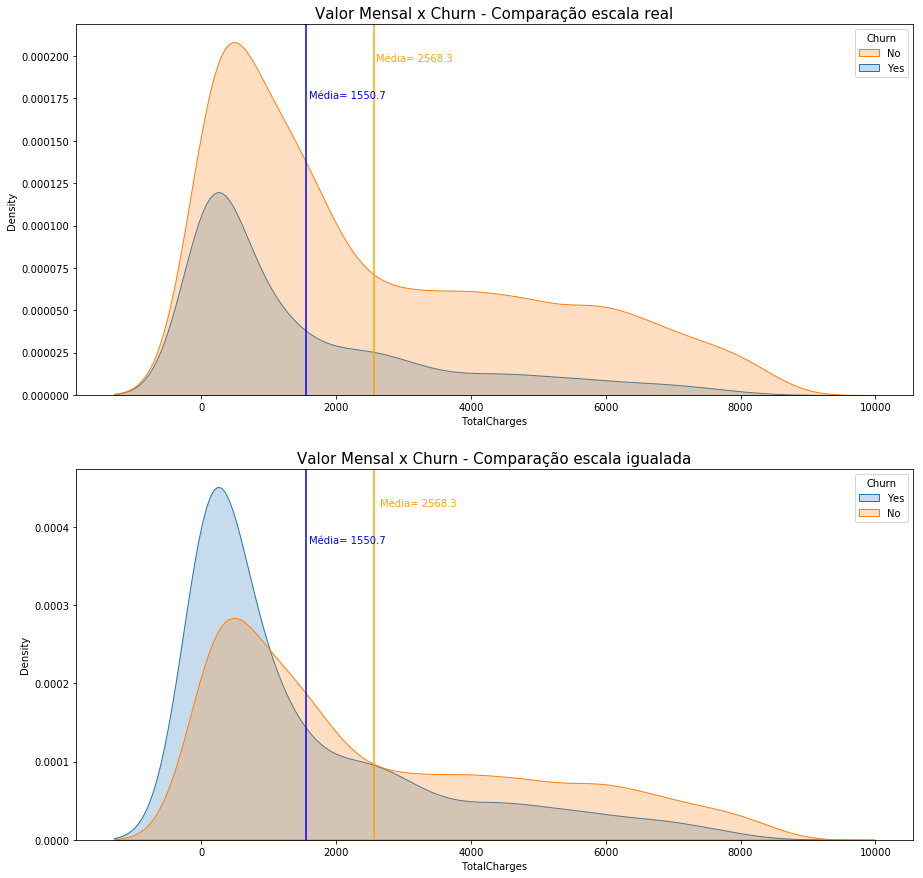

In [32]:
plt.figure(figsize= (15, 15))

# Gráfico 1
plt.subplot(2, 1, 1)
sns.kdeplot(df3['TotalCharges'], hue= df3['Churn'], shade= True, palette={'Yes':'#1f77b4', 'No':'#ff7f0e'})
plt.title('Valor Mensal x Churn - Comparação escala real', fontsize= 15)

# Linhas
plt.axvline(yes_churn['TotalCharges'].mean(), color= 'blue')
plt.axvline(no_churn['TotalCharges'].mean(), color= 'orange')

# Textos
min_y, max_y= plt.ylim()
plt.text(yes_churn['TotalCharges'].mean()*1.03, max_y*0.8, 
         'Média= {:.1f}'.format(yes_churn['TotalCharges'].mean()), color= 'blue')

plt.text(no_churn['TotalCharges'].mean()*1.01, max_y*0.9, 
         'Média= {:.1f}'.format(no_churn['TotalCharges'].mean()), color= 'orange')


# Gráfico 2
plt.subplot(2, 1, 2)
sns.kdeplot(yes_churn['TotalCharges'], shade= True)
sns.kdeplot(no_churn['TotalCharges'], shade= True)
plt.legend(['Yes', 'No'], title= 'Churn')
plt.title('Valor Mensal x Churn - Comparação escala igualada', fontsize= 15)

# Linhas
plt.axvline(yes_churn['TotalCharges'].mean(), color= 'blue')
plt.axvline(no_churn['TotalCharges'].mean(), color= 'orange')

# Textos
min_y, max_y= plt.ylim()
plt.text(yes_churn['TotalCharges'].mean()*1.03, max_y*0.8, 
         'Média= {:.1f}'.format(yes_churn['TotalCharges'].mean()), color= 'blue')

plt.text(no_churn['TotalCharges'].mean()*1.03, max_y*0.9, 
         'Média= {:.1f}'.format(no_churn['TotalCharges'].mean()), color= 'orange')

In [33]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TamanhoFamilia,NumeroServicos
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,Grande,2
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,Pequena,5
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,Média,3
3,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,Pequena,3
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,Pequena,4


## 5.0. Preparação dos Dados

### 5.1. Rescaling
- Rescaling -> Verificaremos quais variáveis possuem um alto número de outliers. Se encontrado, usaremos o RobustScaler com melhor desempenho para essas variáveis, pois usará quartis em vez de máximo e mínimo.Para variáveis que não possuem outliers, usaremos MinMaxScaler.

In [34]:
df4= df3.copy()

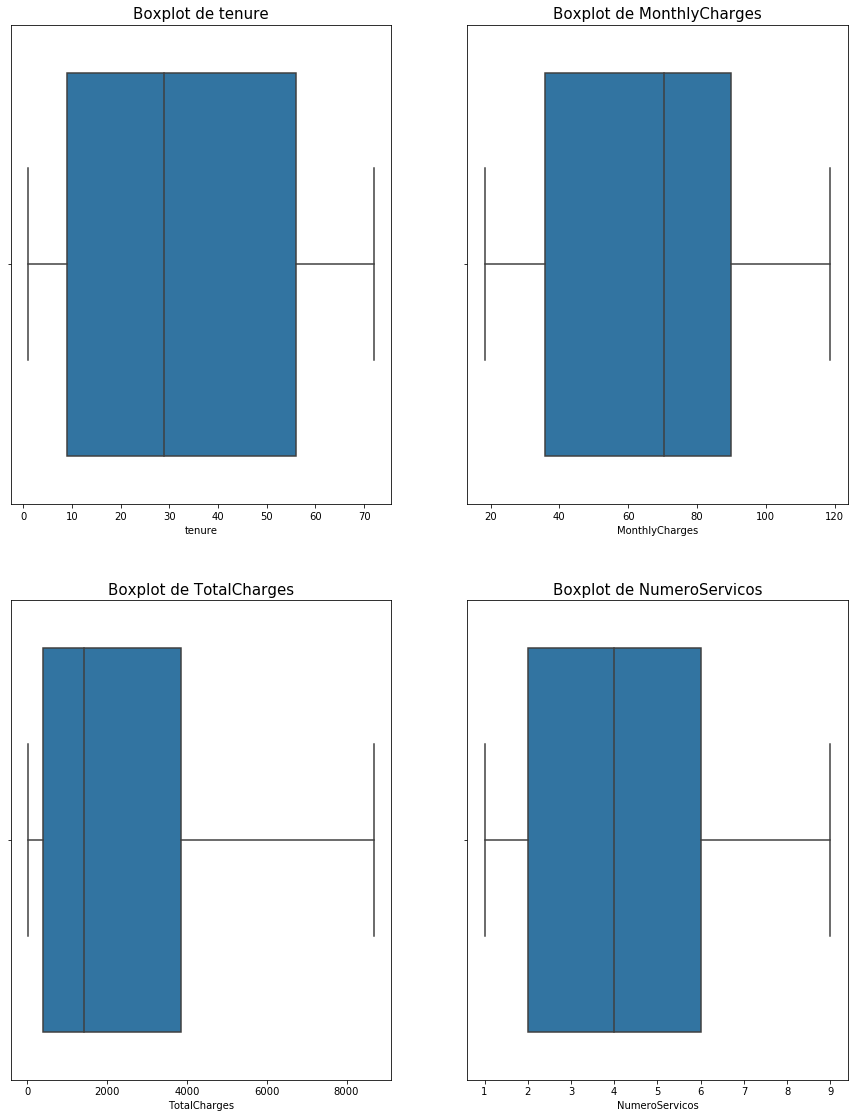

In [35]:
lista= ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumeroServicos']

plt.figure(figsize= (15, 30))
n= 1
for i in lista:
    plt.subplot(3, 2, n)
    sns.boxplot(x= i, data= df4)
    plt.title('Boxplot de {}'.format(i), fontsize= 15)
    n+= 1

Como não observamos outliers nas features numéricas, vamos fazer o rescaling usando o MinMaxScaler em todos.

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df4_scaled= pd.DataFrame(scaler.fit_transform(df4[['tenure', 'MonthlyCharges', 'TotalCharges']]), 
                         columns= ['tenure', 'MonthlyCharges', 'TotalCharges'])

df4_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,1.000000,0.058209,0.197998
1,0.605634,0.695522,0.456312
2,0.521127,0.564179,0.328993
3,0.042254,0.374627,0.025352
4,0.014085,0.350249,0.011620


### 5.2. Encoding
#### Label Enconder

LabelEncoder é uma classe de utilitário para ajudar a normalizar rótulos de forma que contenham apenas valores entre 0 e n_classes-1. Não queremos criar várias colunas novas, portanto, usaremos o label encoder sabendo que poderemos criar um viés

In [37]:
df_categoricas= df4[['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 
 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'TamanhoFamilia']]

df_categoricas.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TamanhoFamilia
0,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No,Grande
1,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,Pequena
2,Female,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes,Média
3,Male,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No,Pequena
4,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,No,Pequena


As features ````SeniorCitizen' e 'NumeroServicos```` já estão em valores valores numéricos

In [38]:
from sklearn.preprocessing import LabelEncoder

for i in df_categoricas.columns:
    encoder= LabelEncoder()
    strings= list(df_categoricas[i].values)
    encoder.fit(strings)
    df_categoricas[i]= encoder.transform(strings)
    
df_categoricas.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TamanhoFamilia
0,1,1,1,1,2,2,1,1,1,1,1,1,2,0,1,0,0
1,0,0,0,1,0,1,0,2,2,0,2,0,0,1,1,0,2
2,0,1,0,1,2,1,0,0,0,0,0,0,0,1,0,1,1
3,1,0,0,1,0,0,0,0,0,0,0,2,0,1,2,0,2
4,1,0,0,1,0,0,2,0,2,0,0,0,0,0,2,0,2


#### 5.3. Concatenar as colunas

In [39]:
df5= pd.concat([df4_scaled, df_categoricas, df4[['SeniorCitizen', 'NumeroServicos']]], axis= 1)

df5.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TamanhoFamilia,SeniorCitizen,NumeroServicos
0,1.000000,0.058209,0.197998,1,1,1,1,2,2,1,...,1,1,1,2,0,1,0,0,0,2
1,0.605634,0.695522,0.456312,0,0,0,1,0,1,0,...,0,2,0,0,1,1,0,2,0,5
2,0.521127,0.564179,0.328993,0,1,0,1,2,1,0,...,0,0,0,0,1,0,1,1,1,3
3,0.042254,0.374627,0.025352,1,0,0,1,0,0,0,...,0,0,2,0,1,2,0,2,0,3
4,0.014085,0.350249,0.011620,1,0,0,1,0,0,2,...,0,0,0,0,0,2,0,2,0,4


In [40]:
 df5[['SeniorCitizen', 'NumeroServicos']].shape

(5976, 2)

Text(0.5,1,'Matriz de Correlação')

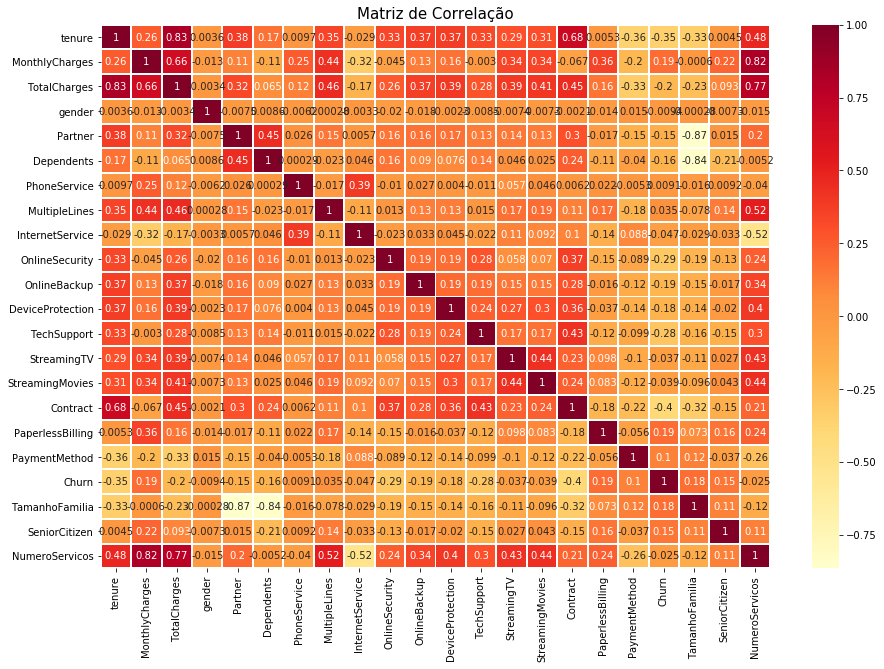

In [41]:
plt.figure(figsize= (15, 10))
sns.heatmap(df5.corr(), annot= True, linewidths= 1, cmap= 'YlOrRd')
plt.title('Matriz de Correlação', fontsize= 15)

- Percebemos uma correlação positiva forte entre tenure e TotalCharges, o que é justificável porque quanto mais tempo uma pessoa fica com a empresa, mais ela paga na sua totalidade.
- O NumeroServicos possui uma correlação positiva forte com MonthlyCharges e TotalCharges, o que também é justificável porque quanto mais serviços o cliente possui, mais caro é a sua mensalidade, consequentemente o total que já pagou.
- TamanhoFamilia possui uma correlação forte negativa entre Partner e Dependents, o que é óbvio pois o tamanho da familia depende de quantos dependentes a pessoa possui e se tem parceiro(a) ou não.

## 6.0. Seleção das Features

Nessa parte, vamos usar 3 modelos de seleção de features: 

- RFE (Recursive Feature Elimination)
- Random Forest
- Boruta

In [42]:
# Separando as variáveis independentes da variável alvo
x= df5.drop(columns= 'Churn')
y= df5['Churn']

print(y.shape)
x.shape

(5976,)


(5976, 21)

In [43]:
df4.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TamanhoFamilia      0
NumeroServicos      0
dtype: int64

In [44]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from boruta import BorutaPy

### 6.1. Recursive Feature Elimination (RFE)

In [45]:
# Definindo modelo
rf = RandomForestClassifier(n_jobs = -1)

# Feature selector
rfe = RFE(rf, n_features_to_select = 10, step = 1)
rfe = rfe.fit(x, y)

# Vendo as features selecionadas
cols_selected = rfe.support_.tolist()
cols_selected_rfe = x.iloc[:, cols_selected].columns.to_list()
cols_selected_rfe

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod',
 'TamanhoFamilia',
 'NumeroServicos']

### 6.2. RandomForest as a Feature Selector

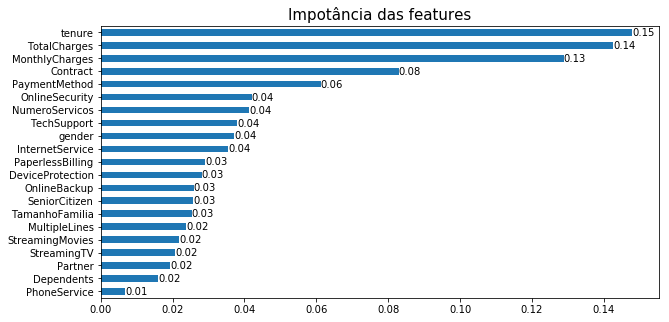

In [46]:
# Definindo modelo
ex_model = ExtraTreesClassifier(n_jobs = -1)
ex_model.fit(x, y)

# Vendo as features selecionadas
feat_importances = pd.Series(ex_model.feature_importances_, index=x.columns)

plt.figure(figsize= (10, 5))
ax= feat_importances.sort_values().plot(kind='barh')
plt.title('Impotância das features', fontsize= 15)

for patch in ax.patches:
    width= patch.get_width()
    left_coord= patch.get_y()
    
    ax.text(width, left_coord, '{:.2f}'.format(width))

In [47]:
['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod',
 'TamanhoFamilia',
 'NumeroServicos']

['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract']

['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract']

### 6.3. Boruta as Feature Selector

In [48]:
# Definindo modelo
rf_model = RandomForestClassifier(n_jobs = -1)

# Boruta
boruta = BorutaPy(rf_model, n_estimators = 'auto', verbose = 2, random_state = 123)
boruta.fit(np.array(x), np.array(y))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	17



BorutaPy(estimator=RandomForestClassifier(n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x28CFF580D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28CFF580D40, verbose=2)

In [49]:
#best features from boruta
cols_selected = boruta.support_.tolist()
cols_selected_boruta = x.iloc[:, cols_selected].columns.to_list()
cols_selected_boruta

['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract']

### 6.4. Seleção das Features
De acordo com os 3 métodos de seleção de features utitlizados acima, as 10 features de maior importância foram:

- 'tenure'
- 'MonthlyCharges'
- 'Contract'
- 'PaymentMethod'
- 'OnlineSecurity'
- 'gender'
- 'TechSupport'
- 'InternetService'
- 'TamanhoFamilia'
- 'PaperlessBilling'

TotalCharges, NumeroServicos foram cortados da nossa relação, pois eles apresentam uma correlação forte entre outras variáveis,  já incluidas nessa lista conforme mostrada na matriz de correlação, o que pode fazer com que o nosso modelo fique tendencioso.

## 7.0. MACHINE LEARNING

Após entendermos melhor nossos dados, a realidade da empresa e prepararmos nossos dados, é hora de utilizarmos Machine Learning para fazer previsões que podem nos ajudar a prever a venda ou não dos carros.

Para isso, avaliaremos a accurácia de 6 modelos diferentes de Machine Learning:

>* LogisticRegression
>* RandomForest
>* DecisionTree
>* KNeighbors
>* SVC
>* AdaBoost

### Classificador  'Burro' (Dummy Classifier)

O classificador dummy nada mais é do que um classificador que utiliza regras básicas. Em outras palavras, ele vai usar algum preditor 'burro' como por exemplo predizer que todos os valores serão iguais a zero – ou a um, dependendo de qual for o mais frequente. Serve como uma linha base para classificar se o modelo de Machine Learning teve uma boa acurácia ou não.


### Validação Cruzada(Cross-Validation)

Para o resultado ser fiel a realidade e não ficar refém da sorte de uma aleatóriedade, utilizaremos validação cruzada. Para saber mais como funciona essa técnica, leia [este artigo](https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=A%20valida%C3%A7%C3%A3o%20cruzada%20%C3%A9%20uma,da%20modelagem%20%C3%A9%20a%20predi%C3%A7%C3%A3o.).

Nesse projeto iremos utilizar o KFold com o numero de folders igual a 10.

In [50]:
from sklearn.model_selection import train_test_split
# Semente global
seed= 123
np.random.seed(seed)

# Vamos separar os nossos dados em dados de treino e dados de teste
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, stratify= y)

In [51]:
from sklearn.dummy import DummyClassifier
# Classificador Burro
# Vamos utilizar a regra de mais frequencia, ou seja, vamos 'chutar' todos os valores como Churn igual a Não(0)

dummy= DummyClassifier(strategy= 'most_frequent')
dummy.fit(x_train, y_train)
print('Linha base: {:.2f}%'.format(dummy.score(x_test, y_test)*100))

Linha base: 73.45%


In [52]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [53]:
models= []

models.append(('Logistic', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('KNeighbors', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('AdaBoost', AdaBoostClassifier()))
models

[('Logistic', LogisticRegression()),
 ('RandomForest', RandomForestClassifier()),
 ('DecisionTree', DecisionTreeClassifier()),
 ('KNeighbors', KNeighborsClassifier()),
 ('SVC', SVC()),
 ('AdaBoost', AdaBoostClassifier())]

In [63]:
np.random.seed(seed)

# Listas para gerar gráfico
results= []
names= []

for name, model in models:
    kfold= KFold(n_splits= 10, shuffle= True)
    cv= cross_val_score(estimator= model, X= x_train, y= y_train, scoring= 'accuracy', cv= kfold)*100
    media= cv.mean()
    std= cv.std()
    print('{:15}: Acurácia Média {:.2f}% - Desvio Padrão Médio {:.2f}%'.format(name, media, std))
    
    results.append(cv)
    names.append(name)

Logistic       : Acurácia Média 79.61% - Desvio Padrão Médio 1.75%
RandomForest   : Acurácia Média 78.99% - Desvio Padrão Médio 1.55%
DecisionTree   : Acurácia Média 71.74% - Desvio Padrão Médio 1.58%
KNeighbors     : Acurácia Média 74.49% - Desvio Padrão Médio 2.26%
SVC            : Acurácia Média 78.91% - Desvio Padrão Médio 2.21%
AdaBoost       : Acurácia Média 79.75% - Desvio Padrão Médio 1.88%


Text(0.5,1,'Comparação de Modelos')

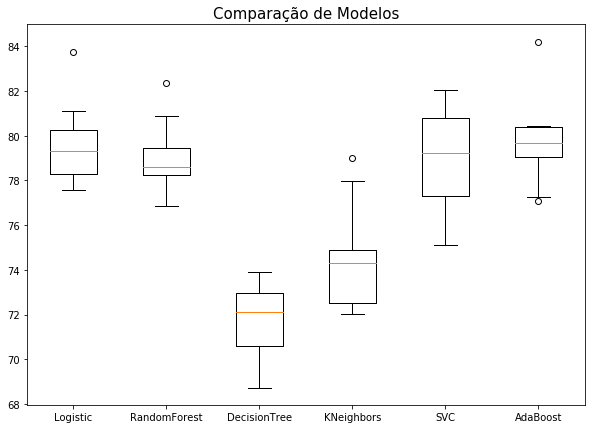

In [55]:
plt.figure(figsize= (10, 7))
plt.boxplot(results, labels= names)
plt.title('Comparação de Modelos', fontsize= 15)

## 8.0. Ajuste dos Hiperparâmetros
Sendo os dois modelos, LogisticRegression e AdaBoostClassifier, como os mais prolíficos, vamos analisar cada um utilizando o GridSearchCV para encontrar o melhor parâmetro.

>* O GridSearchCV é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo, pois ele fará de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto.
Para saber mais, leia [este artigo](https://andersonuyekita.github.io/notebooks/blog/2019/03/21/como-usar-o-gridsearchcv/#:~:text=O%20GridSearchCV%20%C3%A9%20uma%20ferramenta,os%20armazenar%C3%A1%20num%20%C3%BAnico%20objeto.).

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### 8.1. LogisticRegression

In [57]:
np.random.seed(seed)

penalty_values= ['l1', 'l2', 'elasticnet', 'none']
C_values= [0.1, 0.5, 1, 1.5, 2]
solver_values= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter_values= [50, 100, 150, 200]
params_values= dict(penalty= penalty_values, C= C_values, solver= solver_values, max_iter= max_iter_values)

modelo= LogisticRegression()
kfold= KFold(n_splits= 10, shuffle= True)
grid= GridSearchCV(estimator= modelo, param_grid= params_values, scoring= 'accuracy')
grid_results= grid.fit(x_train, y_train)
print('Melhor acurácia : {:.2f}% com os parâmetros {}'.format(grid_results.best_score_*100, grid_results.best_params_))

means= grid_results.cv_results_['mean_test_score']*100
params= grid_results.cv_results_['params']
for mean, param in zip(means,params):
    print('{:.2f}% : {}'.format(mean,param))

Melhor acurácia : 80.11% com os parâmetros {'C': 0.5, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
nan% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'newton-cg'}
nan% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'lbfgs'}
79.68% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
nan% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'sag'}
79.35% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}
79.32% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}
79.30% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
79.46% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
79.32% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'sag'}
79.37% : {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'saga'}
nan% : {'C': 0.1, 'max_iter': 50, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan% : {'C': 0.1, 'max_iter': 50, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan% : {'C'

In [58]:
logistic= LogisticRegression(C= 0.5, max_iter= 50, penalty= 'l1', solver= 'saga')

logistic.fit(x_train, y_train)
y_pred= logistic.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1317
           1       0.65      0.56      0.60       476

    accuracy                           0.80      1793
   macro avg       0.75      0.73      0.74      1793
weighted avg       0.80      0.80      0.80      1793



Text(0.5,42,'Predição')

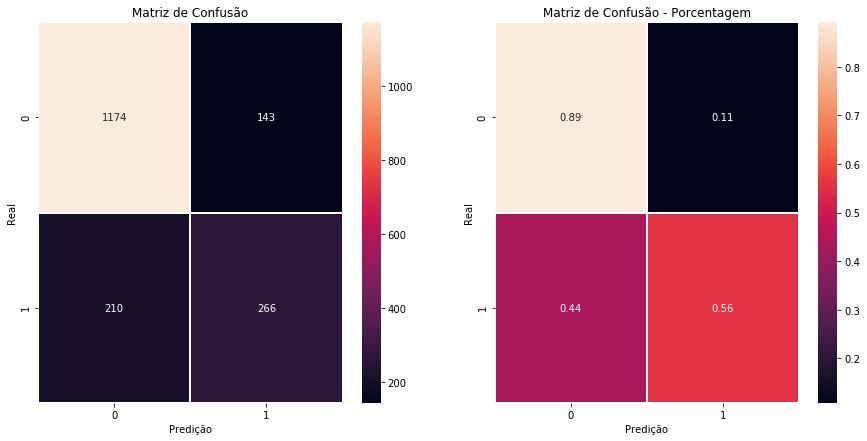

In [59]:
cm= confusion_matrix(y_test, y_pred)
cmp= confusion_matrix(y_test, y_pred, normalize= 'true')

plt.figure(figsize= (15, 7))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot= True, linewidths= 1, fmt= 'g')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predição')


plt.subplot(1, 2, 2)
sns.heatmap(cmp, annot= True, linewidths= 1)
plt.title('Matriz de Confusão - Porcentagem')
plt.ylabel('Real')
plt.xlabel('Predição')

### 8.2. AdaBoostClassifier

In [60]:
np.random.seed(seed)

n_estimators_values= [1, 50, 100 , 200]
learning_rate_values= [0.1, 0.5, 1, 1.5, 2]
algorithm_values= ['SAMME', 'SAMME.R']
params_values= dict(n_estimators= n_estimators_values, learning_rate= learning_rate_values, algorithm= algorithm_values)

modelo= AdaBoostClassifier()
kfold= KFold(n_splits= 10, shuffle= True)
grid= GridSearchCV(estimator= modelo, param_grid= params_values, scoring= 'accuracy')
grid_results= grid.fit(x_train, y_train)
print('Melhor acurácia : {:.2f}% com os parâmetros {}'.format(grid_results.best_score_*100, grid_results.best_params_))

means= grid_results.cv_results_['mean_test_score']*100
params= grid_results.cv_results_['params']
for mean, param in zip(means,params):
    print('{:.2f}% : {}'.format(mean,param))

Melhor acurácia : 80.16% com os parâmetros {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50}
73.44% : {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 1}
73.44% : {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
78.01% : {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
79.06% : {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}
73.44% : {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 1}
79.66% : {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
79.94% : {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100}
80.13% : {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}
73.44% : {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 1}
79.73% : {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}
80.01% : {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}
79.90% : {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
73.44% 

In [61]:
ada= AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.5, n_estimators= 50)

ada.fit(x_train, y_train)
y_pred= ada.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1317
           1       0.66      0.57      0.61       476

    accuracy                           0.81      1793
   macro avg       0.76      0.73      0.74      1793
weighted avg       0.80      0.81      0.80      1793



Text(0.5,42,'Predição')

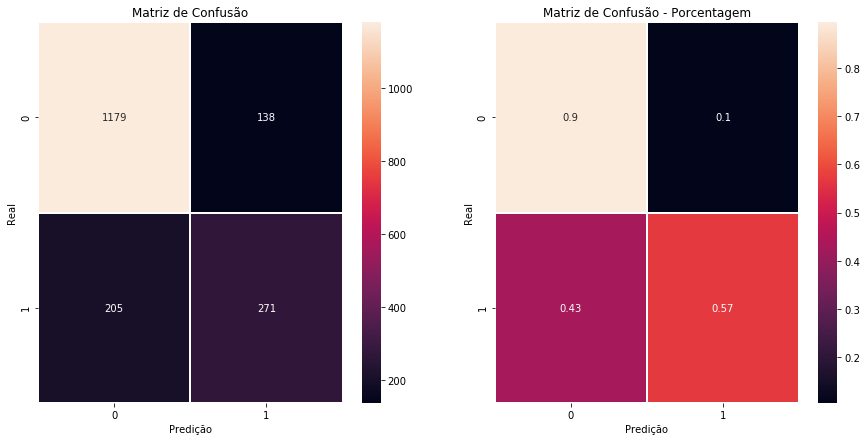

In [62]:
cm= confusion_matrix(y_test, y_pred)
cmp= confusion_matrix(y_test, y_pred, normalize= 'true')

plt.figure(figsize= (15, 7))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot= True, linewidths= 1, fmt= 'g')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predição')


plt.subplot(1, 2, 2)
sns.heatmap(cmp, annot= True, linewidths= 1)
plt.title('Matriz de Confusão - Porcentagem')
plt.ylabel('Real')
plt.xlabel('Predição')

## 9.0. Performance de Negócio

### 9.1. Insights
- Focar a estratégia nos grupos abaixo, pois são aqueles que apresentam as maiores probabilidades de dar Churn de acordo com as hipóteses levantadas:
    - Clientes mais velhos.
    - Cliente com famílias pequenas.
    - Clientes novos.
    - Clientes com poucos serviços.
    - Clientes com o tipo de contrato mês a mês.
    - Clientes que pagam com Eletronic Check.
    - Clientes com valor mensal alto.

### 9.2. Performance dos modelos
Conseguimos observar que os dois modelos conseguem prever muito bem quando o Churn é negativo, com uma acurácia perto de 90%.

Já quando tentamos prever quando o Churn é positivo, vemos o nosso Recall(sensibilidade) uma performance de apenas 57%. 

### 9.3. Próximos Passos
- Montar as estatégias com os grupos de clientes mencionados acima.
- Selecionar outras features para ver se a performance do Recall do modelo melhora.
- Treinar com outros modelos.
- Conseguir mais dados com Churn positivo.